In this part we are going to extract the vertical flux of kinetic energy.
The Reynold shear stress and carnopy shear stress we have in the get_Reynolds by Long.
The mean velocity we have in the get velocity profile part.
I have two plan.
Plan number one import two part into this file
Plan number two open data file of each part

Every thing is the same. So don't worry.

In [107]:
#import necessary libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import tecplot_io as tec
import h5py
import matplotlib.ticker as tck


In [108]:
def get_dispersive_shear_stress(path):
    os.chdir(path)
    print("current working directory is: {0}".format(os.getcwd()))
    #open nessesary file
    fname = 'mean_field_3d.h5'
    f = h5py.File(fname, "r")
    u = f["u"]
    v = f["v"]
    w2 = f["w"]
    w = np.array(w2).copy()
    #get mean velocity profile
    NPX = u.shape[2]
    NPY = u.shape[1]
    NPZ = u.shape[0]
    u_horizontal  = np.zeros((NPZ,3))
    u_hm = np.zeros((NPZ, NPY, NPX))
    v_hm = np.zeros((NPZ, NPY, NPX))
    w_hm = np.zeros((NPZ, NPY, NPX))
    u_prime_all = np.zeros((NPZ, NPY, NPX))
    v_prime_all = np.zeros((NPZ, NPY, NPX))
    w_prime_all = np.zeros((NPZ, NPY, NPX))


    w[0, :, :] = w2[0, :, :]
    for k in range(1,NPZ):
        w[k, :, :] = 0.5*(w2[k-1, :, :] + w2[k, :, :])
        u_horizontal[k, 0] = np.average(u[k,:,:])
        u_horizontal[k, 1] = np.average(v[k,:,:])
        u_horizontal[k, 2] = np.average(w[k,:,:])
    #redimensionalize array
    for i in range (NPX):
        for j in range (NPY):
            u_hm[:,j,i] = u_hm[:,j,i] + u_horizontal[:,0]
            v_hm[:,j,i] = v_hm[:,j,i] + u_horizontal[:,1]
            w_hm[:,j,i] = w_hm[:,j,i] + u_horizontal[:,2]
    #horizontal average mean velocity profile

    #get instantaneous velocity profile
    for it in range(nti):
        ti = tis + tii * it
        fname = 'DAT_{:010d}.h5'.format(ti)
    #    print("Reading file "+ fname)
        f1 = h5py.File(fname, "r")

        #print("Keys: %s" % f.keys())
        ## Old version Keys: [u'dz', u'dzw', u'eta', u'eta0', u'hh', u'pp', u'u', u'v', u'w', u'z', u'zw', u'zz']
        ## New version Keys: [u'eta', u'hh', u'pp', u'u', u'v', u'w', u'z']
        u_i = f1["u"]
        v_i = f1["v"]
        w2_i = f1["w"]
        w_i = np.array(w2_i).copy()

        w_i[0, :, :] = w2_i[0, :, :]
        for k in range(1,NPZ):
            w_i[k, :, :] = 0.5*(w2_i[k-1, :, :] + w2_i[k, :, :])
        u_prime = u_i - u_hm
        v_prime = v_i - v_hm
        w_prime = w_i - w_hm 

        u_prime_all = u_prime_all + u_prime
        v_prime_all = v_prime_all + v_prime
        w_prime_all = w_prime_all + w_prime
    
#time average
    u_prime_all = u_prime_all / nti
    v_prime_all = v_prime_all / nti
    w_prime_all = w_prime_all / nti

    #get dispersive shear stress
    dispersive_shear_stress = -(u_prime_all * w_prime_all)
    #dispersive_shear_stress_horizontal_average
    dispersive_shear_stress_horizontal_average = np.zeros((NPZ))
    for i in range(NPZ):
        dispersive_shear_stress_horizontal_average[i] = np.average(dispersive_shear_stress[i,:,:])
    return dispersive_shear_stress_horizontal_average

In [109]:
def get_reynolds_shear_stress(path):
    os.chdir(path)
    print("Current directory: " + os.getcwd())
    fname = 'mean_tke_3d.h5'
    f2 = h5py.File(fname, "r")
    tke = f2["TKE"]
    Reynolds = f2["u'w'"]
    Reynolds_horizal_average = np.zeros((NPZ))
    for i in range(NPZ):
        Reynolds_horizal_average[i] = np.average(Reynolds[i,:,:])
    return Reynolds_horizal_average

In [110]:
def get_zz(path):
    os.chdir(path)
    print("Current directory: " + os.getcwd())
    fname = 'DAT_{:010d}.h5'.format(tis)
    f1 = h5py.File(fname, "r")
    zz = np.array(f1["z"][:,0,0]).copy()
    return zz

The following function will calculate the derivative of velocity along z direction. The velocity field has one dimension in this case.

In [111]:
def get_derivative(u, z):
    dudz = np.zeros((NPZ-1))
    for k in range(NPZ):
        dudz[k] = (u[k+1] - u[k]) / (z[k+1] - z[k])
    return dudz

In [112]:
#parameters
#kappa = 0.4
#nu = 1.511e-5
#PEX = 1.45444104333
#PEY = 8.72664625997
#hbar = 0.46
#uinfty = 2.54390548295
dt = 0.68543297937
#Rotational angular period
T_turb = 42.84
U_star = 0.356
H_hub = 70
#Mean finite velocity
U = 11.5258407161
tis = 200
tie = 15000
tii = 200
nti = int((tie - tis) / tii + 1)

In [113]:
#change working directory
path = path = 'd:\post\Project\Fixed_Turbine'
os.chdir(path)
print("current working directory is: {0}".format(os.getcwd()))

current working directory is: d:\post\Project\Fixed_Turbine


In [114]:
fname = 'mean_field_3d.h5'
f0 = h5py.File(fname, "r")
u = f0["u"]
NPX = u.shape[2]
NPY = u.shape[1]
NPZ = u.shape[0]

The following script will calculate mean velocity

In [115]:
for it in range(nti):
    ti = tis + tii * it
    time = ti * dt
    fname = 'DAT_{:010d}.h5'.format(ti)
#    print("Reading file "+ fname)
    f = h5py.File(fname, "r")

    #print("Keys: %s" % f.keys())
    ## Old version Keys: [u'dz', u'dzw', u'eta', u'eta0', u'hh', u'pp', u'u', u'v', u'w', u'z', u'zw', u'zz']
    ## New version Keys: [u'eta', u'hh', u'pp', u'u', u'v', u'w', u'z']
    
    zz = np.array(f["z"][:,0,0]).copy()
    u = f["u"]
    v = f["v"]
    w2 = f["w"]
    w = np.array(w2).copy()

#   print(u.shape)

    NPX = u.shape[2]
    NPY = u.shape[1]
    NPZ = u.shape[0]
    
    if it==0:
      u_m_all = np.zeros((NPZ,3))

    w[0, :, :] = w2[0, :, :]
    for k in range(1,NPZ):
      w[k, :, :] = 0.5*(w2[k-1, :, :] + w2[k, :, :])

    u_m = np.zeros((NPZ,3))

    for k in range(NPZ):
      u_m[k, 0] = np.average(u[k,:,:])
      u_m[k, 1] = np.average(v[k,:,:])
      u_m[k, 2] = np.average(w[k,:,:])
    u_m_all = u_m_all + u_m

u_m_all = u_m_all / nti


In [121]:
u_mean = np.zeros((NPZ))
u_mean = u_m_all 
reynold = get_reynolds_shear_stress(path)
carnopy = get_dispersive_shear_stress(path)
flux_kinetic_energy = (reynold + carnopy)*u_mean[:,0]*(U/U_star)**3
zz = get_zz(path) 

Current directory: d:\post\Project\Fixed_Turbine
current working directory is: d:\post\Project\Fixed_Turbine
Current directory: d:\post\Project\Fixed_Turbine


In [122]:
for i in range(NPZ):
    if (zz[i] >= H_hub - 40) and (zz[i] <= H_hub + 40):
        print(i)

8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


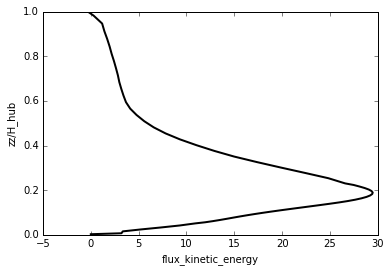

In [123]:
plt.style.use('classic')
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(flux_kinetic_energy, zz/500, '-', color='black', linewidth=2)
plt.xlabel('flux_kinetic_energy')
plt.ylabel('zz/H_hub')
plt.show()

In [119]:
dudz = get_derivative(u_mean[:,0], zz)
dissipation = (reynold + carnopy)*dudz

IndexError: index 64 is out of bounds for axis 0 with size 64

In [ ]:
plt.style.use('classic')
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(dissipation, zz, '-', color='black', linewidth=2)
plt.xlabel('flux_kinetic_energy')
plt.ylabel('zz/H_hub')
plt.show()